__Objective__ : To find the target customer based on their income and spending score

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt,seaborn as sns

__Data description__ : The dataset contains data of 200 customers over 5 factors Gender, Age , Annual Income (k$) , Spending Score (1-100)


In [2]:
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('Mall_Customers.csv',index_col=0)

In [4]:
df.shape

(200, 4)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Checking the uniqueness of each column

In [6]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df['Age'].unique()
 

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [8]:
df=df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'})

In [9]:
df.head()

,Gender,Age,Income,Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [10]:
df.isnull().sum()

#No Null Values

Gender    0
Age       0
Income    0
Score     0
dtype: int64

In [11]:
df.Score.dtype

dtype('int64')

__Gender Count__

Female    112
Male       88
Name: Gender, dtype: int64


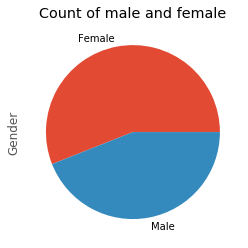

In [12]:
df.Gender.value_counts().plot.pie()
plt.title('Count of male and female')
print(df.Gender.value_counts())
plt.show()

Women come to the mall more often than men

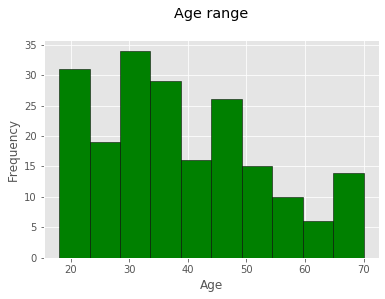

In [13]:
plt.hist(df['Age'],color='green',edgecolor='black')
plt.title('Age range\n')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- No People above the age group of 70 and below the age of 20 have been recorded
- Most people lie between the age range (30-40)

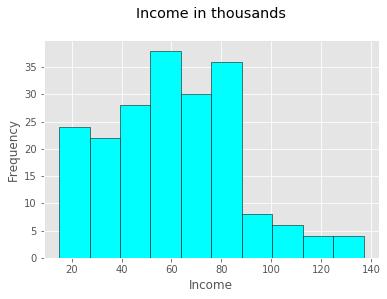

In [14]:
plt.hist(df['Income'],color='cyan',edgecolor='black')
plt.title('Income in thousands\n')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

- Most people earn between 50K to 60 K dollars
- Very few earn more than 80K to 140K dollars

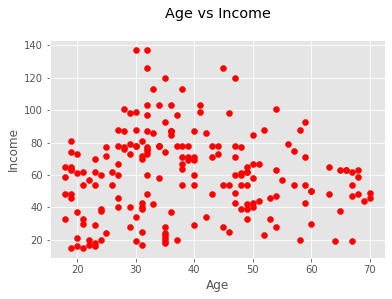

In [15]:
plt.scatter(df.Age,df.Income,color='red')
plt.title('Age vs Income\n')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

- Observe that people betwen the age range 25-40 earn the most which should ideally be our target customers

#### Taking the annual income and spending score in order to cluster

In [16]:
x=df[['Income','Score']]

In [17]:
x.head()

,Income,Score
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


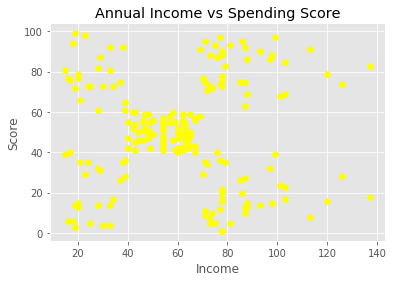

In [18]:
plt.scatter(x.Income,x.Score,color='yellow')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

**Importing k-means clustering from the sklearn library**

In [19]:
from sklearn.cluster import KMeans

In [20]:
wcss=[]

# Within cluster sum of squares, creating an empty 
#list to check the sum of squares

In [21]:
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)                  #Training to fit into clusters
    wcss.append(km.inertia_)   #Sum of sqaures 

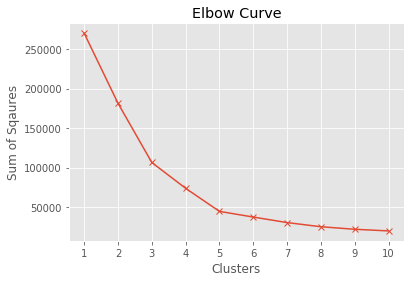

In [22]:
plt.plot(np.arange(1,11,1),wcss,marker='x')
plt.xticks(np.arange(1,11,1))         #Since we iterated through 11 numbers for
plt.xlabel('Clusters')                # 11 possible clusters
plt.title('Elbow Curve')              
plt.ylabel('Sum of Sqaures')         
plt.show()

- 5 looks like the most even amount of spread of variations and hence we take 5 clusters i.e. k=5

In [23]:
#Now takin 5 clusters

km1=KMeans(n_clusters=5)

In [24]:
km1.fit(x)     #Fitting the model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
# Predicting and sorting which group the customer falls in

y=km1.predict(x)

In [26]:
# Adding a new label to dataset

df['group']=y

In [27]:
df.head(10)

,Gender,Age,Income,Score,group
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,3
3,Female,20,16,6,1
4,Female,23,16,77,3
5,Female,31,17,40,1
6,Female,22,17,76,3
7,Female,35,18,6,1
8,Female,23,18,94,3
9,Male,64,19,3,1


In [28]:
unique_labels=np.unique(df.group)

In [29]:
unique_labels

array([0, 1, 2, 3, 4])

In [30]:
df1=df[df['group']==0]
df2=df[df['group']==1]
df3=df[df['group']==2]
df4=df[df['group']==3]
df5=df[df['group']==4]

In [31]:
centroids=km1.cluster_centers_

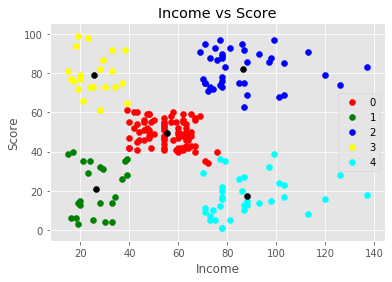

In [32]:
plt.scatter(df1.Income,df1.Score,color='r')
plt.scatter(df2.Income,df2.Score,color='g')
plt.scatter(df3.Income,df3.Score,color='b')
plt.scatter(df4.Income,df4.Score,color='yellow')
plt.scatter(df5.Income,df5.Score,color='cyan')
plt.scatter(centroids[:,0],centroids[:,1],color='black')
plt.legend(unique_labels)
plt.xlabel('Income')
plt.ylabel('Score')
plt.title('Income vs Score')
plt.show()

- Green represent the groups that spend the least and earn the least
- Dark Blue earns the most and spends the most
- Light Blue or cyan group earns the most and spends the least
- Yellow earns the least and spends a lot
- Red group earns and spends moderately.

__Conclusion__
    
    - We should be targeting dark blue, red and the yellow group the most as they spend the most amount of money at the mall
    